In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Change below to get to your file directory
%cd drive/MyDrive/Caltech/Senior/BEM120

/content/drive/MyDrive/Caltech/Senior/BEM120


College Stats:
https://www.kaggle.com/datasets/calvintancy/college-game-statistics-of-nba-players

Combine Stats:
https://www.kaggle.com/datasets/marcusfern/nba-draft-combine

Reputation:
https://www.ncaa.com/news/basketball-men/article/2018-10-05/best-conferences-ncaa-tournament-play-1985

Team Success:
https://www.espn.com/mens-college-basketball/rankings/_/year/

In [ ]:
import pandas as pd

file_path = 'combine.csv'
combine = pd.read_csv(file_path)

file_path2 = 'college_stats.csv'
college_stats = pd.read_csv(file_path2)

file_path3 = 'draftpicks.csv'
draftpicks = pd.read_csv(file_path3)

file_path4 = 'Reputation.xlsx'
reputation = pd.read_excel(file_path4)

file_path5 = 'Team_Success.xlsx'
team_success = pd.read_excel(file_path5)

In [ ]:
def convert_name(name):
    parts = name.split(", ")
    if len(parts) == 2:
        return f"{parts[1]} {parts[0]}"
    return name

combine['name'] = combine['PLAYER'].apply(convert_name)

In [ ]:
# Last season in college_stats
college_stats_sorted = college_stats.sort_values(by=['name', 'season'])
college_last = college_stats_sorted.drop_duplicates(subset='name', keep='last')

In [ ]:
#Removed all players that don't have both college stats and combine stats
merged_df = pd.merge(combine, college_last, on='name', how='inner')

columns_to_prefix = [
    'age', 'g', 'mp', 'fg', 'fga', 'fg3', 'fg3a', 'ft', 'fta',
    'orb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts',
    'fg_pct', 'fg3_pct', 'ft_pct', 'mp_per_g', 'pts_per_g',
    'trb_per_g', 'ast_per_g', 'player_html'
]

merged_df = merged_df.rename(columns={col: f"college_{col}" for col in columns_to_prefix})
print(merged_df.columns)

Index(['YEAR', 'PLAYER', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
       'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT',
       'BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT', 'name', 'college_age',
       'college_id', 'college_g', 'college_mp', 'college_fg', 'college_fga',
       'college_fg3', 'college_fg3a', 'college_ft', 'college_fta',
       'college_orb', 'college_trb', 'college_ast', 'college_stl',
       'college_blk', 'college_tov', 'college_pf', 'college_pts',
       'college_fg_pct', 'college_fg3_pct', 'college_ft_pct',
       'college_mp_per_g', 'college_pts_per_g', 'college_trb_per_g',
       'college_ast_per_g', 'college_player_html', 'season'],
      dtype='object')


In [ ]:
# **WEBSCRAPING: Don't need to run it a second time - dataset is in folder
#
# import requests
# from bs4 import BeautifulSoup
# import io

# years = list(range(2000, 2025))  # 2000 to 2024

# base_url = "https://www.basketball-reference.com/draft/NBA_{}.html"

# List to store dataframes
# all_drafts = []

# for year in years:
#     url = base_url.format(year)
#     response = requests.get(url)
#     soup = BeautifulSoup(response.content, 'html.parser')
#
#     table = soup.find('table', {'id': 'stats'})
#
#     if table:
#         try:
#             df = pd.read_html(io.StringIO(str(table)))[0]
#
#             df.columns = [' '.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]
#
#             player_col = [col for col in df.columns if 'Player' in col][0]
#             df = df[df[player_col].notna()]
#
#             df = df.rename(columns={player_col: 'Player'})
#
#             df['Draft_Year'] = year
#
#             all_drafts.append(df)
#         except Exception as e:
#             print(f"Error processing year {year}: {e}")
#     else:
#         print(f"Table not found for year {year}")
#
# Combine all years into one DataFrame
# combined_df = pd.concat(all_drafts, ignore_index=True)
#
# combined_df.to_csv('nba_draft_2000_2024.csv', index=False)
#
# print(combined_df.head())

In [ ]:
draft_df = draftpicks.rename(columns={'Player': 'name'})
draft_prediction = pd.merge(merged_df, draft_df, on='name', how='inner')

print(draft_prediction.head())
print(f"Total players in merged set: {len(draft_prediction)}")

   YEAR               PLAYER POS    HGT    WGT    BMI     BF  WNGSPN  STNDRCH  \
0  2022        Davis, Johnny  PG  76.25  196.4  23.75  0.067   80.50    103.5   
1  2021      Barnes, Scottie  SF  79.00  225.4  25.39  0.053   86.75    108.0   
2  2021      Bassey, Charles   C  81.25  230.2  24.51  0.059   87.00    107.5   
3  2021  Boston Jr., Brandon  SF  77.75  188.0  21.86  0.060   82.75    104.0   
4  2021     Bouknight, James  SG  75.50  190.0  23.43  0.055   80.25    101.5   

   HANDL  ...  Shooting FT%  Per Game MP  Per Game PTS  Per Game TRB  \
0   8.50  ...          .561         11.4           3.5           1.6   
1   9.25  ...          .765         34.6          17.1           7.5   
2   9.00  ...          .648         11.2           4.4           4.3   
3   9.00  ...          .781         16.0           7.5           2.2   
4   8.75  ...          .762         11.4           4.8           1.7   

   Per Game AST  Advanced WS  Advanced WS/48  Advanced BPM  Advanced VORP  \
0  

In [ ]:
columns_to_remove = ['PLAYER', 'Unnamed: 0_level_0 Rk']
draft_prediction = draft_prediction.drop(columns=columns_to_remove, errors='ignore')

col = 'name'
draft_prediction = draft_prediction[[col] + [c for c in draft_prediction.columns if c != col]]

draft_prediction = draft_prediction.rename(columns={
    'Unnamed: 1_level_0 Pk': 'pick_number',
    'Unnamed: 2_level_0 Tm': 'Team',
    'Unnamed: 5_level_0 Yrs': 'career_length',
    'Round 1 College': 'college_team'
})

In [ ]:
print(draft_prediction.columns)

Index(['name', 'YEAR', 'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
       'HANDL', 'HANDW', 'STNDVERT', 'LPVERT', 'LANE', 'SHUTTLE', 'SPRINT',
       'BENCH', 'BAR', 'PAN', 'PBHGT', 'PDHGT', 'college_age', 'college_id',
       'college_g', 'college_mp', 'college_fg', 'college_fga', 'college_fg3',
       'college_fg3a', 'college_ft', 'college_fta', 'college_orb',
       'college_trb', 'college_ast', 'college_stl', 'college_blk',
       'college_tov', 'college_pf', 'college_pts', 'college_fg_pct',
       'college_fg3_pct', 'college_ft_pct', 'college_mp_per_g',
       'college_pts_per_g', 'college_trb_per_g', 'college_ast_per_g',
       'college_player_html', 'season', 'pick_number', 'Team', 'college_team',
       'career_length', 'Totals G', 'Totals MP', 'Totals PTS', 'Totals TRB',
       'Totals AST', 'Shooting FG%', 'Shooting 3P%', 'Shooting FT%',
       'Per Game MP', 'Per Game PTS', 'Per Game TRB', 'Per Game AST',
       'Advanced WS', 'Advanced WS/48', 'Advanced BPM', 'Ad

In [ ]:
draft_prediction = draft_prediction[draft_prediction['YEAR'] < 2020]

In [ ]:
columns_to_remove = ['career_length', 'Totals G', 'Totals MP', 'Totals PTS', 'Totals TRB',
       'Totals AST', 'Shooting FG%', 'Shooting 3P%', 'Shooting FT%',
       'Per Game MP', 'Per Game PTS', 'Per Game TRB', 'Per Game AST',
       'Advanced WS', 'Advanced WS/48', 'Advanced BPM', 'Advanced VORP']
draft_prediction = draft_prediction.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
print(len(draft_prediction))

648


In [ ]:
conference_map = {
    'DUKE': 'ACC',
    'UNC': 'ACC',
    'VIRGINIA': 'ACC',
    'MIAMIFL': 'ACC',
    'WAKE': 'ACC',
    'LOUISVILLE': 'ACC',
    'FSU': 'ACC',
    'SYRACUSE': 'ACC',
    'GATECH': 'ACC',
    'BOSTONCOLL': 'ACC',
    'CLEMSON': 'ACC',
    'NCSTATE': 'ACC',
    'NOTREDAME': 'ACC',
    'VATECH': 'ACC',

    'KENTUCKY': 'SEC',
    'TENNESSEE': 'SEC',
    'FLORIDA': 'SEC',
    'LSU': 'SEC',
    'ALABAMA': 'SEC',
    'MISSST': 'SEC',
    'MISSOURI': 'SEC',
    'TEXASAM': 'SEC',
    'VANDY': 'SEC',
    'GEORGIA': 'SEC',
    'SFLORIDA': 'AAC',
    'ARKANSAS': 'SEC',
    'AUBURN': 'SEC',

    'MICHIGAN': 'Big Ten',
    'MICHIGANST': 'Big Ten',
    'OHIOST': 'Big Ten',
    'INDIANA': 'Big Ten',
    'IOWA': 'Big Ten',
    'PURDUE': 'Big Ten',
    'MARYLAND': 'Big Ten',
    'MINNESOTA': 'Big Ten',
    'WISCONSIN': 'Big Ten',
    'NEBRASKA': 'Big Ten',
    'ILLINOIS': 'Big Ten',
    'RUTGERS': 'Big Ten',
    'NORTHWESTERN': 'Big Ten',
    'UCLA': 'Big Ten',
    'USC': 'Big Ten',

    'UCLA': 'Pac-12',
    'OREGON': 'Pac-12',
    'OREGONST': 'Pac-12',
    'STANFORD': 'Pac-12',
    'ARIZONA': 'Pac-12',
    'ARIZONAST': 'Pac-12',
    'USC': 'Pac-12',
    'COLORADO': 'Pac-12',
    'UTAH': 'Pac-12',
    'CALIFORNIA': 'Pac-12',
    'WASHST': 'Pac-12',
    'WASHINGTON': 'Pac-12',

    'KANSAS': 'Big 12',
    'BAYLOR': 'Big 12',
    'TEXAS': 'Big 12',
    'TXTECH': 'Big 12',
    'OKLAHOMA': 'Big 12',
    'OKSTATE': 'Big 12',
    'KANSASST': 'Big 12',
    'TCU': 'Big 12',
    'IOWAST': 'Big 12',
    'WESTVIRGINIA': 'Big 12',

    'GONZAGA': 'WCC',
    'STMARYSCA': 'WCC',
    'PEPPERDINE': 'WCC',
    'BYU': 'Big 12',

    'UCONN': 'Big East',
    'VILLANOVA': 'Big East',
    'XAVIER': 'Big East',
    'CREIGHTON': 'Big East',
    'SETONHALL': 'Big East',
    'DEPAUL': 'Big East',
    'GEORGETOWN': 'Big East',
    'PROVIDENCE': 'Big East',
    'STJOHNS': 'Big East',
    'MARQUETTE': 'Big East',
    'BUTLER': 'Big East',

    'MEMPHIS': 'AAC',
    'HOUSTON': 'Big 12',
    'SMETHODIST': 'AAC',
    'TULANE': 'AAC',
    'TEMPLE': 'AAC',
    'TULSA': 'AAC',
    'CFLORIDA': 'Big 12',

    'YALE': 'Ivy League',
    'LEHIGH': 'Patriot League',
    'BUCKNELL': 'Patriot League',
    'WEBERST': 'Big Sky',
    'DAVIDSON': 'A-10',
    'VCU': 'A-10',
    'RICHMOND': 'A-10',
    'DAYTON': 'A-10',
    'STBONNY': 'A-10',
    'LASALLE': 'A-10',
    'GEORGIAST': 'Sun Belt',
    'ULALA': 'Sun Belt',
    'MURRAYST': 'MVC',
    'VALPO': 'MVC',
    'TNTECH': 'OVC',
    'TNMARTIN': 'OVC',
    'MOREHEAD': 'OVC',
    'BELMONT': 'MVC',
    'UNLV': 'Mountain West',
    'NEVADA': 'Mountain West',
    'NMEXICO': 'Mountain West',
    'SANDIEGOST': 'Mountain West',
    'COLORADOST': 'Mountain West',
    'FRESNOST': 'Mountain West',
    'UCSB': 'Big West',
    'CALSTFULL': 'Big West',
}

draft_prediction['Conference'] = draft_prediction['college_id'].map(conference_map).fillna('Unknown')

print(draft_prediction.head())

                        name  YEAR POS    HGT    WGT    BMI     BF  WNGSPN  \
58  Nickeil Alexander-Walker  2019  SG  76.25  203.8  24.64  0.059   81.50   
59                   Bol Bol  2019   C  84.75  208.0  20.36  0.071   91.00   
60               Jordan Bone  2019  SG  73.50  179.0  23.29  0.050   75.25   
61          Ignas Brazdeikis  2019  SF  77.75  220.8  25.68  0.060   81.25   
62            Brandon Clarke  2019  SF  79.25  207.2  23.19  0.049   80.25   

    STNDRCH  HANDL  ...  college_pts_per_g  college_trb_per_g  \
58    102.0   8.50  ...               16.2                4.1   
59    115.5   9.25  ...               21.0                9.6   
60     95.0   7.50  ...               13.5                3.2   
61    102.0   8.75  ...               14.8                5.4   
62    102.0   8.25  ...               16.9                8.6   

    college_ast_per_g                                college_player_html  \
58                4.0  https://www.basketball-reference.com/play

In [ ]:
reputation['ReputationScore'] = (
    0.6 * reputation['Percentage'] +
    0.4 * (reputation['Championships since 1985'] / reputation['Championships since 1985'].max())
)
print(reputation.head())

  Conference  Total wins  Total losses  Percentage  Championships since 1985  \
0        ACC         270           136       0.665                        10   
1        SEC         209           129       0.618                         6   
2    Big Ten         243           160       0.603                         3   
3   Big East         242           162       0.599                         8   
4     Big 12         155           113       0.578                         1   

   ReputationScore  
0           0.7990  
1           0.6108  
2           0.4818  
3           0.6794  
4           0.3868  


In [ ]:
rep_df = reputation[['Conference', 'ReputationScore']]

draft_prediction = draft_prediction.merge(rep_df, on='Conference', how='left')

In [ ]:
draft_prediction['ReputationScore'] = draft_prediction['ReputationScore'].fillna(0)

In [ ]:
cols_to_drop = ['SHUTTLE', 'HANDL', 'HANDW', 'PAN']

draft_prediction = draft_prediction.drop(columns=cols_to_drop)

In [ ]:
missing_counts = draft_prediction.isnull().sum().sort_values(ascending=False)
missing_counts = missing_counts[missing_counts > 0]
print(missing_counts)

BENCH               144
LANE                 87
SPRINT               82
LPVERT               79
PDHGT                79
BF                   78
PBHGT                77
STNDVERT             77
college_fg3_pct      57
college_orb          18
college_stl           3
college_tov           3
college_blk           3
college_pf            3
WGT                   3
BMI                   3
BAR                   1
STNDRCH               1
POS                   1
HGT                   1
college_mp_per_g      1
college_mp            1
dtype: int64


In [ ]:
columns_to_check = [
    'BENCH', 'LANE', 'SPRINT',
    'PDHGT', 'LPVERT', 'PBHGT', 'STNDVERT', 'BF'
]

missing_by_year = draft_prediction.groupby('YEAR')[columns_to_check].apply(lambda group: group.isnull().sum())
missing_by_year

,BENCH,LANE,SPRINT,PDHGT,LPVERT,PBHGT,STNDVERT,BF
YEAR,,,,,,,,
2000,0,2,3,2,2,2,2,15
2001,0,1,0,0,0,0,0,1
2002,2,1,1,1,1,1,1,29
2003,1,2,2,2,2,1,1,0
2004,1,2,2,2,2,2,2,1
2005,3,4,3,3,3,3,3,29
2006,2,0,0,0,0,0,0,0
2007,1,0,0,0,0,0,0,0
2008,0,2,2,2,2,1,1,0


In [ ]:
from sklearn.ensemble import RandomForestRegressor

df_imputed = draft_prediction.copy()
skip_bf_years = [2000, 2002, 2005]

# Best predictors based on correlation matrix
predictor_map = {
    'BF': ['BMI', 'HGT'],
    'STNDVERT': ['LPVERT', 'SPRINT'],
    'college_trb': ['HGT', 'college_orb', 'PDHGT'],
    'college_ast': ['college_stl', 'college_tov', 'college_mp_per_g'],
    'college_pts': ['college_fg', 'college_fga', 'college_ft'],
    'college_tov': ['college_stl', 'college_mp_per_g', 'college_mp'],
    'BENCH': ['BMI', 'college_orb']
}

imputed_counts = {}

for target, predictors in predictor_map.items():
    if target == 'BF':
        subset = df_imputed[~df_imputed['YEAR'].isin(skip_bf_years)].copy()
    else:
        subset = df_imputed.copy()

    has_val = subset[subset[target].notna()]
    missing_val = subset[subset[target].isna()]

    X_train = has_val[predictors].dropna()
    y_train = has_val.loc[X_train.index, target]

    if len(X_train) < 10:
        continue

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    full_missing = df_imputed[df_imputed[target].isna()]
    X_missing = full_missing[predictors].dropna()

    if not X_missing.empty:
        preds = model.predict(X_missing)
        df_imputed.loc[X_missing.index, target] = preds
        imputed_counts[target] = len(preds)

print(imputed_counts)

{'BF': 76, 'BENCH': 141}


In [ ]:
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

df_lookalike = df_imputed.copy()

knn_feature_map = {
    'SPRINT':  ['HGT', 'STNDVERT', 'college_blk'],
}

if 'POS' in df_lookalike.columns:
    df_lookalike = pd.get_dummies(df_lookalike, columns=['POS'], drop_first=True)

knn_imputed_counts = {}

for target, features in knn_feature_map.items():
    available_features = [f for f in features if f in df_lookalike.columns or f.startswith("POS_")]
    similarity_features = [f for f in df_lookalike.columns if f in available_features or f.startswith("POS_")]

    lookup_data = df_lookalike[similarity_features].dropna()

    if lookup_data.empty:
        continue

    knn = NearestNeighbors(n_neighbors=5)
    knn.fit(lookup_data)

    missing_idx = df_lookalike[df_lookalike[target].isna()].index
    count = 0

    for idx in missing_idx:
        player_row = df_lookalike.loc[idx, similarity_features]

        if player_row.isna().any():
            continue

        distances, indices = knn.kneighbors([player_row])
        neighbor_vals = df_lookalike.loc[lookup_data.iloc[indices[0]].index, target].dropna()

        if not neighbor_vals.empty:
            df_lookalike.at[idx, target] = neighbor_vals.mean()
            count += 1

    if count > 0:
        knn_imputed_counts[target] = count

print(knn_imputed_counts)

{'SPRINT': 5}


In [ ]:
pos_columns = [col for col in df_lookalike.columns if col.startswith('POS_')]
df_lookalike['imputed_POS'] = df_lookalike[pos_columns].idxmax(axis=1).str.replace('POS_', '')
remaining_missing = df_lookalike.columns[df_lookalike.isnull().any()]

for col in remaining_missing:
    if df_lookalike[col].dtype in ['float64', 'int64']:
        df_lookalike[col] = df_lookalike.groupby('imputed_POS')[col].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df_lookalike['WGT'] = pd.to_numeric(df_lookalike['WGT'], errors='coerce')
df_lookalike['WGT'] = df_lookalike.groupby('imputed_POS')['WGT'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
cols_to_drop = [
    'college_fg3a', 'college_ast', 'college_trb', 'college_fga', 'STNDRCH',
    'PBHGT', 'college_orb', 'college_pts', "college_fta"
]

df_lookalike = df_lookalike.drop(columns=[col for col in cols_to_drop if col in df_lookalike.columns], errors='ignore')


In [ ]:
# One-hot encoding
#encode_cols = ['POS', 'college_g', 'HANDW', 'college_age', 'HANDL']
#df = pd.get_dummies(df, columns=[col for col in encode_cols if col in df.columns], drop_first=True)

In [ ]:
df_lookalike.rename(columns=lambda x: x.strip(), inplace=True)
df_lookalike.rename(columns={'year': 'YEAR'}, inplace=True)

In [ ]:
df_lookalike['college_team'] = df_lookalike['college_team'].astype(str).str.strip().str.upper()
team_success['Team'] = team_success['Team'].astype(str).str.strip().str.upper()

df_lookalike['YEAR'] = df_lookalike['YEAR'].astype(int)
team_success['Year'] = team_success['Year'].astype(int)

In [ ]:
df_lookalike = df_lookalike.merge(
    team_success[['Year', 'Team', 'PTS']],
    left_on=['YEAR', 'college_team'],
    right_on=['Year', 'Team'],
    how='left'
)
df_lookalike['PTS'] = df_lookalike['PTS'].fillna(0)
df_lookalike.rename(columns={'PTS': 'Team_success'}, inplace=True)

In [ ]:
df_lookalike.drop(columns=['Year', 'Team_y'], inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.stats import spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

base_columns = [
    'POS', 'HGT', 'WGT', 'BMI', 'BF', 'WNGSPN', 'STNDRCH',
    'STNDVERT', 'LPVERT', 'LANE', 'BENCH', 'BAR', 'PBHGT', 'PDHGT', 'college_age',
    'college_g', 'college_mp', 'college_fg', 'college_fga', 'college_fg3',
    'college_fg3a', 'college_ft', 'college_fta', 'college_orb',
    'college_trb', 'college_ast', 'college_stl', 'college_blk',
    'college_tov', 'college_pf', 'college_pts', 'college_fg_pct',
    'college_fg3_pct', 'college_ft_pct', 'college_mp_per_g',
    'college_pts_per_g', 'college_trb_per_g', 'college_ast_per_g',
    'ReputationScore', 'draft_year', 'YEAR', 'Team_success'
]

df = df_lookalike.copy()
df['VERT_SUM'] = df['STNDVERT'] + df['LPVERT']
df.drop(columns=['STNDVERT', 'LPVERT'], inplace=True, errors='ignore')

usable_cols = [col for col in base_columns if col in df.columns]
usable_cols.append('VERT_SUM')
usable_cols = list(set(usable_cols))

df = df[usable_cols + ['pick_number']].copy()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna()
if len(df) < 10:
    raise ValueError("Not enough data after cleaning.")

correlations = df.corr(numeric_only=True)['pick_number'].drop('pick_number')

sorted_corr = correlations.reindex(correlations.abs().sort_values(ascending=False).index)

print("Correlation of each feature with pick_number:\n")
for col, corr in sorted_corr.items():
    print(f"{col:<30} {corr:>7.4f}")

Correlation of each feature with pick_number:

college_age                     0.4205
Team_success                   -0.1778
college_ft                     -0.1756
college_fg                     -0.1644
college_blk                    -0.1596
PDHGT                          -0.1591
ReputationScore                -0.1540
college_fg_pct                 -0.1464
college_stl                    -0.1409
college_g                      -0.1283
college_tov                    -0.1269
college_trb_per_g              -0.1127
college_pf                     -0.1112
college_pts_per_g              -0.1046
YEAR                            0.1012
HGT                            -0.1000
college_mp                     -0.0809
WNGSPN                         -0.0787
WGT                            -0.0551
VERT_SUM                       -0.0530
college_fg3                     0.0393
college_ft_pct                  0.0351
BF                              0.0335
LANE                            0.0268
BMI              

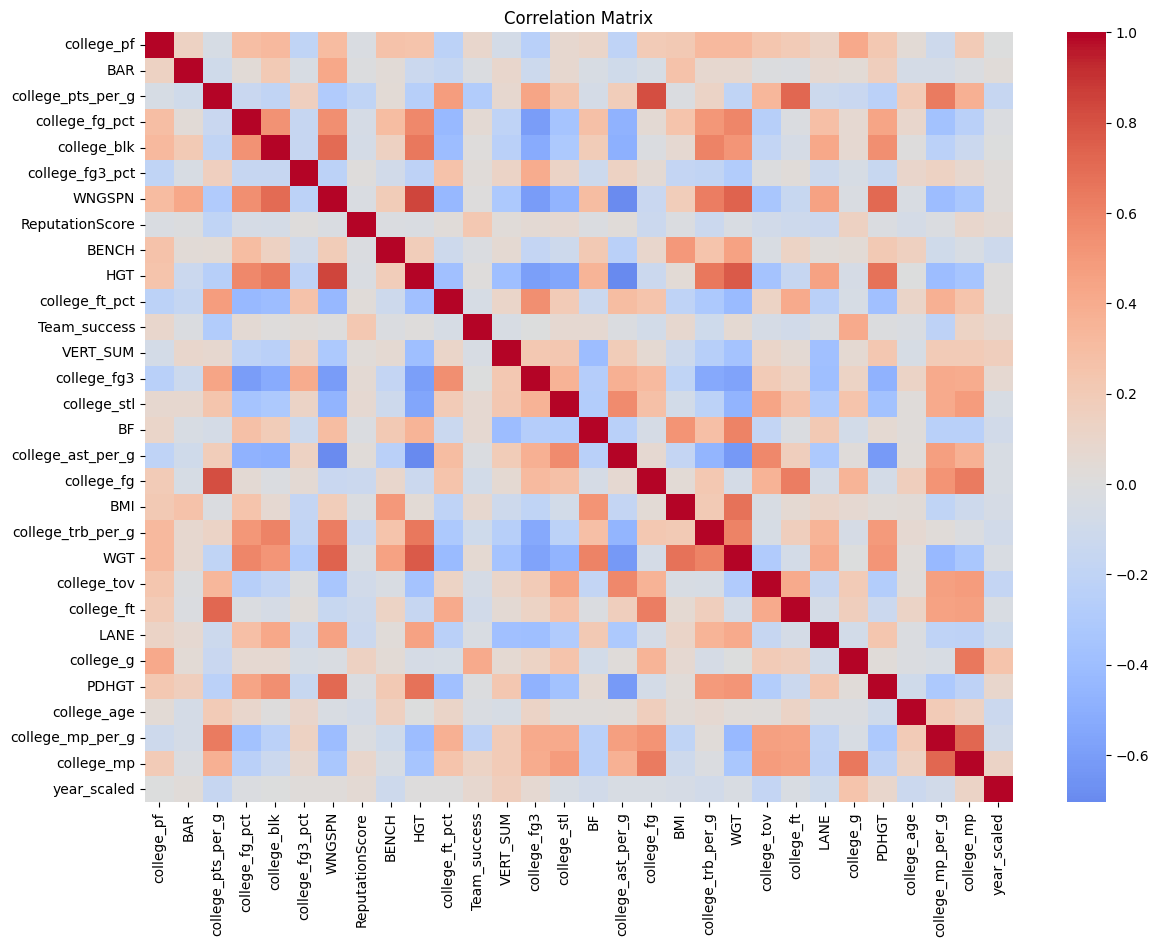


Highly Correlated Feature Pairs (>|0.85|):


In [ ]:
train_df = df[df['YEAR'] <= 2016]
test_df = df[df['YEAR'] > 2016]

X_train = train_df.drop(columns=['pick_number'])
y_train = train_df['pick_number']
X_test = test_df.drop(columns=['pick_number'])
y_test = test_df['pick_number']

X_train['year_scaled'] = (X_train['YEAR'] - X_train['YEAR'].min()) / (X_train['YEAR'].max() - X_train['YEAR'].min())
X_test['year_scaled'] = (X_test['YEAR'] - X_train['YEAR'].min()) / (X_train['YEAR'].max() - X_train['YEAR'].min())

X_train = X_train.drop(columns=['YEAR'])
X_test = X_test.drop(columns=['YEAR'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

corr_matrix = pd.DataFrame(X_train_scaled, columns=X_train.columns).corr()
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Matrix")
plt.show()

high_corr_pairs = []
threshold = 0.85
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            col1 = corr_matrix.columns[i]
            col2 = corr_matrix.columns[j]
            high_corr_pairs.append((col1, col2, corr_matrix.iloc[i, j]))

print("\nHighly Correlated Feature Pairs (>|0.85|):")
for col1, col2, corr in sorted(high_corr_pairs, key=lambda x: -abs(x[2])):
    print(f"{col1} and {col2}: {corr:.2f}")

In [ ]:
X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)

model = sm.OLS(y_train, X_train_sm).fit()
preds = model.get_prediction(X_test_sm)
pred_summary = preds.summary_frame(alpha=0.05)

y_pred = pred_summary['mean'].values

lae = np.mean(np.abs(np.log1p(y_test) - np.log1p(y_pred)))
weights = 1 / (y_test + 1)
iwe = np.mean(weights * np.abs(y_test - y_pred))

spearman_corr, _ = spearmanr(y_test, y_pred)

print("\nCustom Evaluation Metrics (Linear Model w/ CI + Drift Awareness):")
print(f"Logarithmic Absolute Error (LAE): {lae:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr:.4f}")


Custom Evaluation Metrics (Linear Model w/ CI + Drift Awareness):
Logarithmic Absolute Error (LAE): 0.4064
Inverse Weighted Error (IWE): 0.3779
Spearman Rank Correlation: 0.6531


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X_train_ridge = train_df.drop(columns=['pick_number', 'YEAR']).copy()
X_test_ridge = test_df.drop(columns=['pick_number', 'YEAR']).copy()

X_train_ridge['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_ridge['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_ridge = train_df['pick_number']
y_test_ridge = test_df['pick_number']

scaler_ridge = StandardScaler()
X_train_scaled_ridge = scaler_ridge.fit_transform(X_train_ridge)
X_test_scaled_ridge = scaler_ridge.transform(X_test_ridge)

best_r2 = -np.inf
best_alpha = None
best_y_pred = None
best_model = None

print("\nRidge Regression Tuning:\n")

for alpha in [0.01, 0.1, 1, 10, 100]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_scaled_ridge, y_train_ridge)
    y_pred_ridge = ridge.predict(X_test_scaled_ridge)
    r2 = r2_score(y_test_ridge, y_pred_ridge)
    print(f"Alpha = {alpha} | R²: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_y_pred = y_pred_ridge
        best_model = ridge

lae_ridge = np.mean(np.abs(np.log1p(y_test_ridge) - np.log1p(best_y_pred)))
weights_ridge = 1 / (y_test_ridge + 1)
iwe_ridge = np.mean(weights_ridge * np.abs(y_test_ridge - best_y_pred))

spearman_corr_ridge, _ = spearmanr(y_test_ridge, best_y_pred)

print("\nBest Ridge Regression Model):")
print(f"Logarithmic Absolute Error (LAE): {lae_ridge:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_ridge:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_ridge:.4f}")


Ridge Regression Tuning:

Alpha = 0.01 | R²: 0.2335
Alpha = 0.1 | R²: 0.2398
Alpha = 1 | R²: 0.2570
Alpha = 10 | R²: 0.2737
Alpha = 100 | R²: 0.2736

Best Ridge Regression Model):
Logarithmic Absolute Error (LAE): 0.3712
Inverse Weighted Error (IWE): 0.3631
Spearman Rank Correlation: 0.6586


In [ ]:
print(f"Number of players in the training set: {X_train_ridge.shape[0]}")
print(f"Number of players in the test set: {X_test_ridge.shape[0]}")

Number of players in the training set: 540
Number of players in the test set: 108


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

X_train_lasso = train_df.drop(columns=['pick_number', 'YEAR']).copy()
X_test_lasso = test_df.drop(columns=['pick_number', 'YEAR']).copy()

X_train_lasso['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_lasso['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_lasso = train_df['pick_number']
y_test_lasso = test_df['pick_number']

scaler_lasso = StandardScaler()
X_train_scaled_lasso = scaler_lasso.fit_transform(X_train_lasso)
X_test_scaled_lasso = scaler_lasso.transform(X_test_lasso)

best_r2 = -np.inf
best_alpha = None
best_y_pred = None
best_model = None

alphas = [0.01, 0.05, 0.075, 0.1, 0.125, 0.15]

print("\nLasso Regression Tuning:\n")

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=50000, tol=1e-4)
    lasso.fit(X_train_scaled_lasso, y_train_lasso)
    y_pred_lasso = lasso.predict(X_test_scaled_lasso)
    r2 = r2_score(y_test_lasso, y_pred_lasso)
    print(f"Alpha = {alpha} | R²: {r2:.4f}")

    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_y_pred = y_pred_lasso
        best_model = lasso

lae_lasso = np.mean(np.abs(np.log1p(y_test_lasso) - np.log1p(best_y_pred)))
weights_lasso = 1 / (y_test_lasso + 1)
iwe_lasso = np.mean(weights_lasso * np.abs(y_test_lasso - best_y_pred))

spearman_corr_lasso, _ = spearmanr(y_test_lasso, best_y_pred)

print("\nCustom Evaluation Metrics (Best Lasso Model):")
print(f"Best Alpha: {best_alpha}")
print(f"R² Score: {best_r2:.4f}")
print(f"Logarithmic Absolute Error (LAE): {lae_lasso:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_lasso:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_lasso:.4f}")


Lasso Regression Tuning:

Alpha = 0.01 | R²: 0.2606
Alpha = 0.05 | R²: 0.2700
Alpha = 0.075 | R²: 0.2729
Alpha = 0.1 | R²: 0.2740
Alpha = 0.125 | R²: 0.2741
Alpha = 0.15 | R²: 0.2737

Custom Evaluation Metrics (Best Lasso Model):
Best Alpha: 0.125
R² Score: 0.2741
Logarithmic Absolute Error (LAE): 0.3679
Inverse Weighted Error (IWE): 0.3595
Spearman Rank Correlation: 0.6585


In [ ]:
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler

X_train_xgb = train_df.drop(columns=['pick_number', 'YEAR']).copy()
X_test_xgb = test_df.drop(columns=['pick_number', 'YEAR']).copy()

X_train_xgb['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_xgb['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_xgb = train_df['pick_number']
y_test_xgb = test_df['pick_number']

scaler_xgb = StandardScaler()
X_train_scaled_xgb = scaler_xgb.fit_transform(X_train_xgb)
X_test_scaled_xgb = scaler_xgb.transform(X_test_xgb)

xgb_model = XGBRegressor(
    n_estimators=350,
    learning_rate=0.12,
    max_depth=7,
    subsample=0.8,
    random_state=42,
    verbosity=0
)

xgb_model.fit(X_train_scaled_xgb, y_train_xgb)
y_pred_xgb = xgb_model.predict(X_test_scaled_xgb)

lae_xgb = np.mean(np.abs(np.log1p(y_test_xgb) - np.log1p(y_pred_xgb)))
weights_xgb = 1 / (y_test_xgb + 1)
iwe_xgb = np.mean(weights_xgb * np.abs(y_test_xgb - y_pred_xgb))

spearman_corr_xgb, _ = spearmanr(y_test_xgb, y_pred_xgb)

print("\nCustom Evaluation Metrics (XGBoost Model):")
print(f"Logarithmic Absolute Error (LAE): {lae_xgb:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_xgb:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_xgb:.4f}")


Custom Evaluation Metrics (XGBoost Model):
Logarithmic Absolute Error (LAE): 0.4299
Inverse Weighted Error (IWE): 0.4215
Spearman Rank Correlation: 0.4707


In [ ]:
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import StandardScaler

X_train_stack = train_df.drop(columns=['pick_number', 'YEAR']).copy()
X_test_stack = test_df.drop(columns=['pick_number', 'YEAR']).copy()

X_train_stack['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_stack['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_stack = train_df['pick_number']
y_test_stack = test_df['pick_number']

scaler_stack = StandardScaler()
X_train_scaled_stack = scaler_stack.fit_transform(X_train_stack)
X_test_scaled_stack = scaler_stack.transform(X_test_stack)

lasso_stack = Lasso(alpha=0.075, max_iter=50000, tol=1e-4)
ridge_stack = Ridge(alpha=10)

stacked_model = StackingRegressor(
    estimators=[
        ('lasso', lasso_stack),
        ('ridge', ridge_stack)
    ],
    final_estimator=LinearRegression(),
    n_jobs=-1
)

stacked_model.fit(X_train_scaled_stack, y_train_stack)
y_pred_stack = stacked_model.predict(X_test_scaled_stack)

lae_stack = np.mean(np.abs(np.log1p(y_test_stack) - np.log1p(y_pred_stack)))
weights_stack = 1 / (y_test_stack + 1)
iwe_stack = np.mean(weights_stack * np.abs(y_test_stack - y_pred_stack))

spearman_corr_stack, _ = spearmanr(y_test_stack, y_pred_stack)

print("\nCustom Evaluation Metrics (Stacking Regressor):")
print(f"Logarithmic Absolute Error (LAE): {lae_stack:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_stack:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_stack:.4f}")


Custom Evaluation Metrics (Stacking Regressor):
Logarithmic Absolute Error (LAE): 0.3706
Inverse Weighted Error (IWE): 0.3718
Spearman Rank Correlation: 0.6445


In [ ]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

X_train_nn = train_df.drop(columns=['pick_number', 'YEAR']).copy()
X_test_nn = test_df.drop(columns=['pick_number', 'YEAR']).copy()

X_train_nn['year_scaled'] = (train_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())
X_test_nn['year_scaled'] = (test_df['YEAR'] - df['YEAR'].min()) / (df['YEAR'].max() - df['YEAR'].min())

y_train_nn = train_df['pick_number']
y_test_nn = test_df['pick_number']

scaler_nn = StandardScaler()
X_train_scaled_nn = scaler_nn.fit_transform(X_train_nn)
X_test_scaled_nn = scaler_nn.transform(X_test_nn)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train_scaled_nn.shape[1],)),
    keras.layers.Dense(32, activation='elu', kernel_regularizer=keras.regularizers.l2(0.003)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(16, activation='elu', kernel_regularizer=keras.regularizers.l2(0.003)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(8, activation='elu', kernel_regularizer=keras.regularizers.l2(0.003)),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(1)
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0005),
    loss='mse'
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train_scaled_nn, y_train_nn,
    validation_data=(X_test_scaled_nn, y_test_nn),
    epochs=300,
    batch_size=8,
    callbacks=[early_stopping],
    verbose=1
)

y_pred_nn = model.predict(X_test_scaled_nn).flatten()

lae_nn = np.mean(np.abs(np.log1p(y_test_nn) - np.log1p(y_pred_nn)))
weights_nn = 1 / (y_test_nn + 1)
iwe_nn = np.mean(weights_nn * np.abs(y_test_nn - y_pred_nn))

spearman_corr_nn, _ = spearmanr(y_test_nn, y_pred_nn)

print("\nCustom Evaluation Metrics (Keras Neural Network):")
print(f"Logarithmic Absolute Error (LAE): {lae_nn:.4f}")
print(f"Inverse Weighted Error (IWE): {iwe_nn:.4f}")
print(f"Spearman Rank Correlation: {spearman_corr_nn:.4f}")

Epoch 1/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 958.9186 - val_loss: 1315.4159
Epoch 2/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1039.0785 - val_loss: 1293.7550
Epoch 3/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 974.3463 - val_loss: 1270.4763
Epoch 4/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 913.1786 - val_loss: 1242.3507
Epoch 5/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 920.2137 - val_loss: 1211.4189
Epoch 6/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 927.9733 - val_loss: 1190.2377
Epoch 7/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 878.9481 - val_loss: 1156.9392
Epoch 8/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 904.8856 - val_loss: 1126.6509
Epoch 9/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 861.2524 - val_loss: 1086.3058
Epoch 10/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 807.8276 - val_loss: 1058.7561
Epoch 11/300
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 822.0193 - val_loss: 1019.8669
Epoch 1

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step

Custom Evaluation Metrics (Keras Neural Network):
Logarithmic Absolute Error (LAE): 0.3781
Inverse Weighted Error (IWE): 0.3562
Spearman Rank Correlation: 0.6324


In [ ]:
!pip install scikeras

In [ ]:
y_true = np.array(y_test_ridge).flatten()
y_pred = np.array(best_y_pred).flatten()

abs_error = np.abs(y_true - y_pred)

within_3 = np.mean(abs_error <= 3) * 100
within_5 = np.mean(abs_error <= 5) * 100
within_10 = np.mean(abs_error <= 10) * 100
within_15 = np.mean(abs_error <= 15) * 100
within_20 = np.mean(abs_error <= 20) * 100

print("\nPrediction Accuracy Ranges (Best Ridge Model):")
print(f"Within ±3 picks:  {within_3:.2f}%")
print(f"Within ±5 picks:  {within_5:.2f}%")
print(f"Within ±10 picks: {within_10:.2f}%")
print(f"Within ±15 picks: {within_15:.2f}%")
print(f"Within ±20 picks: {within_20:.2f}%")


Prediction Accuracy Ranges (Best Ridge Model):
Within ±3 picks:  16.67%
Within ±5 picks:  29.63%
Within ±10 picks: 50.00%
Within ±15 picks: 72.22%
Within ±20 picks: 86.11%


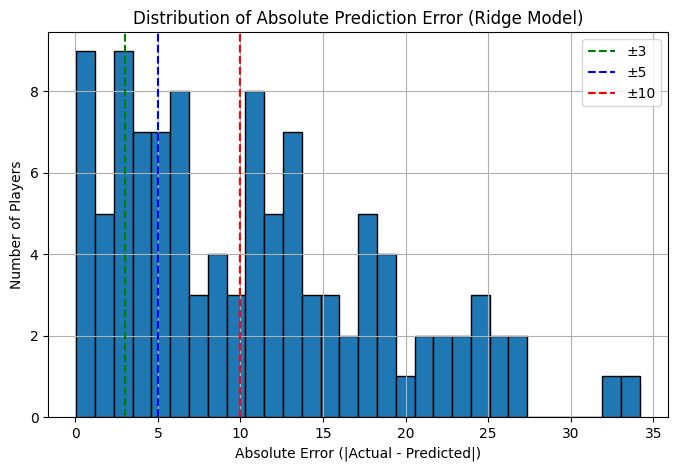

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(abs_error, bins=30, edgecolor='black')
plt.axvline(3, color='green', linestyle='--', label='±3')
plt.axvline(5, color='blue', linestyle='--', label='±5')
plt.axvline(10, color='red', linestyle='--', label='±10')
plt.title("Distribution of Absolute Prediction Error (Ridge Model)")
plt.xlabel("Absolute Error (|Actual - Predicted|)")
plt.ylabel("Number of Players")
plt.legend()
plt.grid(True)
plt.show()

25 Random Player Predictions (Best Ridge Model):
                   Name  Actual Pick  Ridge Predicted Pick
            Harry Giles           20                 13.75
          Marial Shayok           54                 42.81
            Tyler Lydon           24                 30.81
Shai Gilgeous-Alexander           11                 16.90
             OG Anunoby           23                 27.03
            Jawun Evans           39                 33.58
          Thomas Bryant           42                 18.97
         Bruno Fernando           34                 18.32
           Khyri Thomas           38                 32.55
         Jarrett Culver            6                  8.82
             Kevin Knox            9                 16.15
        Cameron Johnson           11                 27.13
      Admiral Schofield           42                 29.94
               Kyle Guy           55                 33.54
 Quinndary Weatherspoon           49                 35.57
       

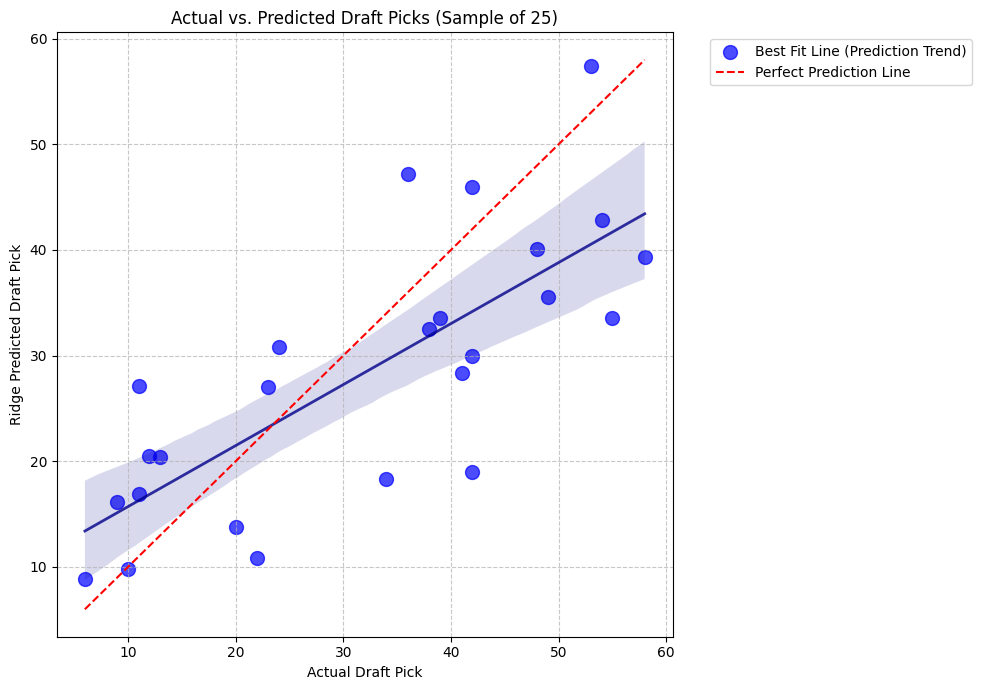

In [ ]:
sample_players = X_test_ridge.sample(25)

sample_y_true = y_test_ridge.loc[sample_players.index]
sample_names = draft_prediction.loc[sample_players.index, 'name']

sample_scaled = scaler_ridge.transform(sample_players)
ridge_sample = best_model.predict(sample_scaled)

predictions_df = pd.DataFrame({
    'Name': sample_names.values,
    'Actual Pick': sample_y_true.values,
    'Ridge Predicted Pick': np.clip(np.round(ridge_sample, 2), 1, None)
})

print("25 Random Player Predictions (Best Ridge Model):")
print(predictions_df.to_string(index=False))

plt.figure(figsize=(10, 7))

sns.regplot(
    x='Actual Pick',
    y='Ridge Predicted Pick',
    data=predictions_df,
    color='blue',
    scatter_kws={'s': 100, 'alpha': 0.7},
    line_kws={'linestyle': '-', 'linewidth': 2, 'alpha': 0.8, 'color': 'darkblue'},
    label='Best Fit Line (Prediction Trend)'
)

min_val = min(predictions_df['Actual Pick'].min(), predictions_df['Ridge Predicted Pick'].min())
max_val = max(predictions_df['Actual Pick'].max(), predictions_df['Ridge Predicted Pick'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction Line')

plt.title('Actual vs. Predicted Draft Picks (Sample of 25)')
plt.xlabel('Actual Draft Pick')
plt.ylabel('Ridge Predicted Draft Pick')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

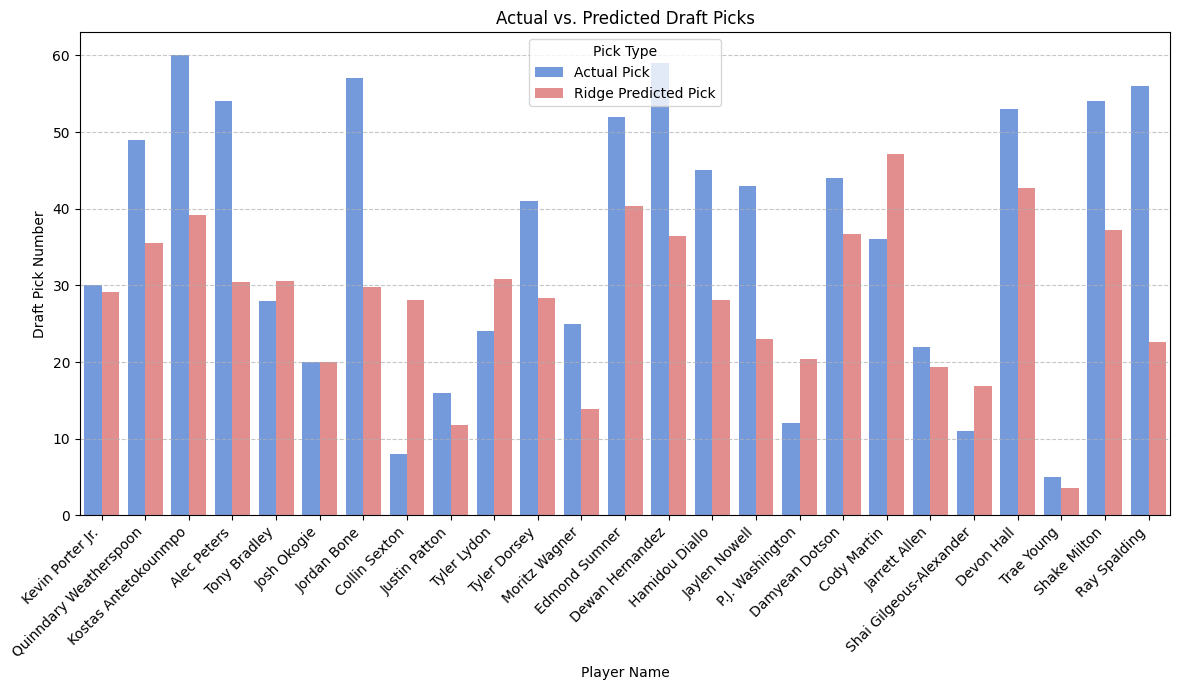

In [ ]:
predictions_melted = predictions_df.melt(id_vars=['Name'], var_name='Type', value_name='Draft Pick')

plt.figure(figsize=(12, 7))
sns.barplot(
    x='Name',
    y='Draft Pick',
    hue='Type',
    data=predictions_melted,
    palette={'Actual Pick': 'cornflowerblue', 'Ridge Predicted Pick': 'lightcoral'}
)

plt.title('Actual vs. Predicted Draft Picks')
plt.xlabel('Player Name')
plt.ylabel('Draft Pick Number')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Pick Type')
plt.tight_layout()
plt.show()

In [ ]:
feature_names = list(train_df.drop(columns=['pick_number', 'YEAR']).columns) + ['year_scaled']

ridge_coefficients = best_model.coef_

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Ridge Coefficient': ridge_coefficients
}).sort_values(by='Ridge Coefficient', key=abs, ascending=False)

print("\nFeature Importances (Ridge Coefficients):")
print(importance_df.to_string(index=False))


Feature Importances (Ridge Coefficients):
          Feature  Ridge Coefficient
      college_age           7.841027
college_pts_per_g          -4.680271
   college_fg_pct          -3.362795
     Team_success          -3.343680
              HGT          -3.045872
college_ast_per_g          -2.972913
      college_stl          -2.666523
            PDHGT          -2.643903
  ReputationScore          -1.881243
      college_blk          -1.865890
      college_fg3          -1.520387
               BF           1.191473
             LANE           1.180427
      year_scaled           1.017269
 college_mp_per_g           0.979748
  college_fg3_pct          -0.727964
       college_ft          -0.229003
       college_mp           0.151504
              WGT          -0.136994
            BENCH           0.122358
   college_ft_pct          -0.074636
      college_tov          -0.010407
         VERT_SUM           0.000000
           WNGSPN          -0.000000
              BAR           0.00


Top 10 Features Most Misestimated by Draft Model (Largest Absolute Difference):
          Feature  Model_A_Coeff  Model_B_Coeff  Difference
      college_age       7.865736       4.204368    3.661368
college_pts_per_g      -4.442067      -1.294596   -3.147471
college_ast_per_g      -2.947746      -0.306892   -2.640854
      college_blk      -2.304855      -0.000000   -2.304855
            PDHGT      -2.403278      -0.425689   -1.977589
           WNGSPN      -1.976986      -0.000000   -1.976986
              HGT      -1.954684      -0.000000   -1.954684
      college_fg3      -1.937709      -0.159737   -1.777972
   college_fg_pct      -3.437950      -1.854901   -1.583049
 college_mp_per_g       1.421760       0.000000    1.421760


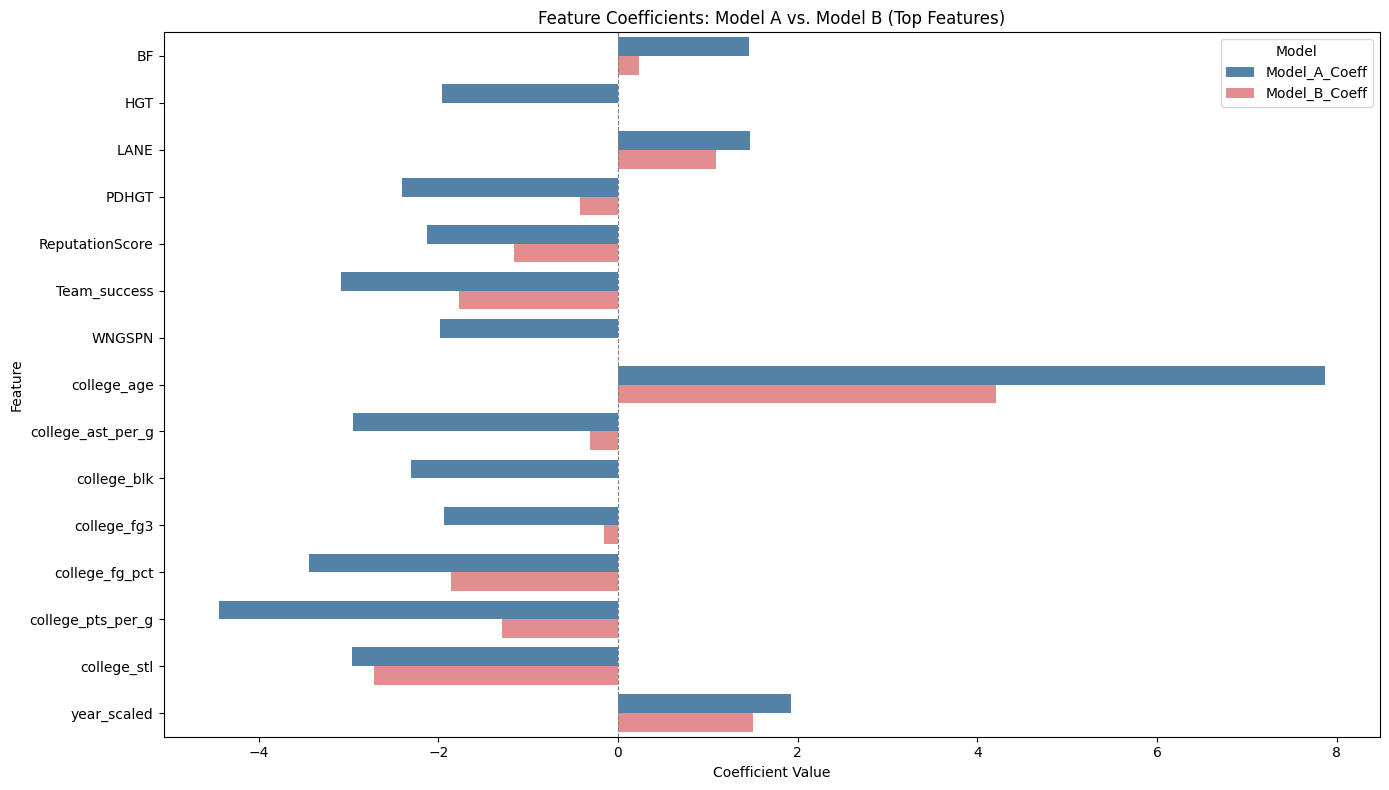

In [ ]:
model_a = pd.DataFrame({
    'Feature': [
        'college_age', 'college_pts_per_g', 'college_fg_pct', 'Team_success', 'college_stl',
        'college_ast_per_g', 'PDHGT', 'college_blk', 'ReputationScore', 'WNGSPN', 'HGT',
        'college_fg3', 'year_scaled', 'LANE', 'BF', 'college_mp_per_g', 'BAR', 'college_ft',
        'college_fg3_pct', 'BENCH', 'BMI', 'VERT_SUM', 'college_tov', 'WGT', 'college_pf',
        'college_fg', 'college_g', 'college_ft_pct', 'college_mp', 'college_trb_per_g'
    ],
    'Model_A_Coeff': [
        7.865736, -4.442067, -3.437950, -3.079936, -2.960500,
        -2.947746, -2.403278, -2.304855, -2.125879, -1.976986, -1.954684,
        -1.937709, 1.922586, 1.474202, 1.458752, 1.421760, 1.021354, -0.797021,
        -0.763456, 0.662365, -0.398601, -0.332795, -0.299726, -0.282167, 0.270575,
        0.249126, 0.157326, -0.097388, -0.067967, 0.060654
    ]
})

model_b = pd.DataFrame({
    'Feature': [
        'college_age', 'college_stl', 'college_fg_pct', 'Team_success', 'year_scaled',
        'college_pts_per_g', 'ReputationScore', 'LANE', 'college_ft_pct', 'BENCH',
        'college_trb_per_g', 'WGT', 'college_fg', 'VERT_SUM', 'PDHGT',
        'college_mp', 'college_pf', 'college_ast_per_g', 'BMI', 'college_fg3_pct',
        'BF', 'college_tov', 'college_fg3', 'college_g', 'BAR',
        'college_ft', 'college_blk', 'college_mp_per_g', 'WNGSPN', 'HGT'
    ],
    'Model_B_Coeff': [
        4.204368, -2.715847, -1.854901, -1.766109, 1.498195,
        -1.294596, -1.155745, 1.093409, -0.968638, 0.866363,
        -0.860973, -0.835767, -0.797757, -0.634681, -0.425689,
        0.399315, 0.315850, -0.306892, -0.298820, 0.261968,
        0.236309, 0.208932, -0.159737, 0.017289, -0.000000,
        0.000000, -0.000000, 0.000000, -0.000000, -0.000000
    ]
})

comparison = pd.merge(model_a, model_b, on='Feature', how='outer').fillna(0)

comparison['Difference'] = comparison['Model_A_Coeff'] - comparison['Model_B_Coeff']
comparison['Abs_Diff'] = comparison['Difference'].abs()

comparison_sorted = comparison.sort_values(by='Abs_Diff', ascending=False)

print("\nTop 10 Features Most Misestimated by Draft Model (Largest Absolute Difference):")
print(comparison_sorted[['Feature', 'Model_A_Coeff', 'Model_B_Coeff', 'Difference']].head(10).to_string(index=False))

comparison['Avg_Abs_Coeff'] = (comparison['Model_A_Coeff'].abs() + comparison['Model_B_Coeff'].abs()) / 2
top_features_for_plot = comparison.sort_values(by='Avg_Abs_Coeff', ascending=False).head(15)

plot_data = top_features_for_plot.melt(id_vars=['Feature'], value_vars=['Model_A_Coeff', 'Model_B_Coeff'],
                                       var_name='Model', value_name='Coefficient')

plt.figure(figsize=(14, 8))
sns.barplot(x='Coefficient', y='Feature', hue='Model', data=plot_data.sort_values(by=['Feature', 'Coefficient'], ascending=[True, False]),
            palette={'Model_A_Coeff': 'steelblue', 'Model_B_Coeff': 'lightcoral'})
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title('Feature Coefficients: Model A vs. Model B (Top Features)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.legend(title='Model')
plt.tight_layout()
plt.show()

<ipython-input-159-46d86b9e7d23>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Difference', y='Feature', data=comparison_sorted.head(15),


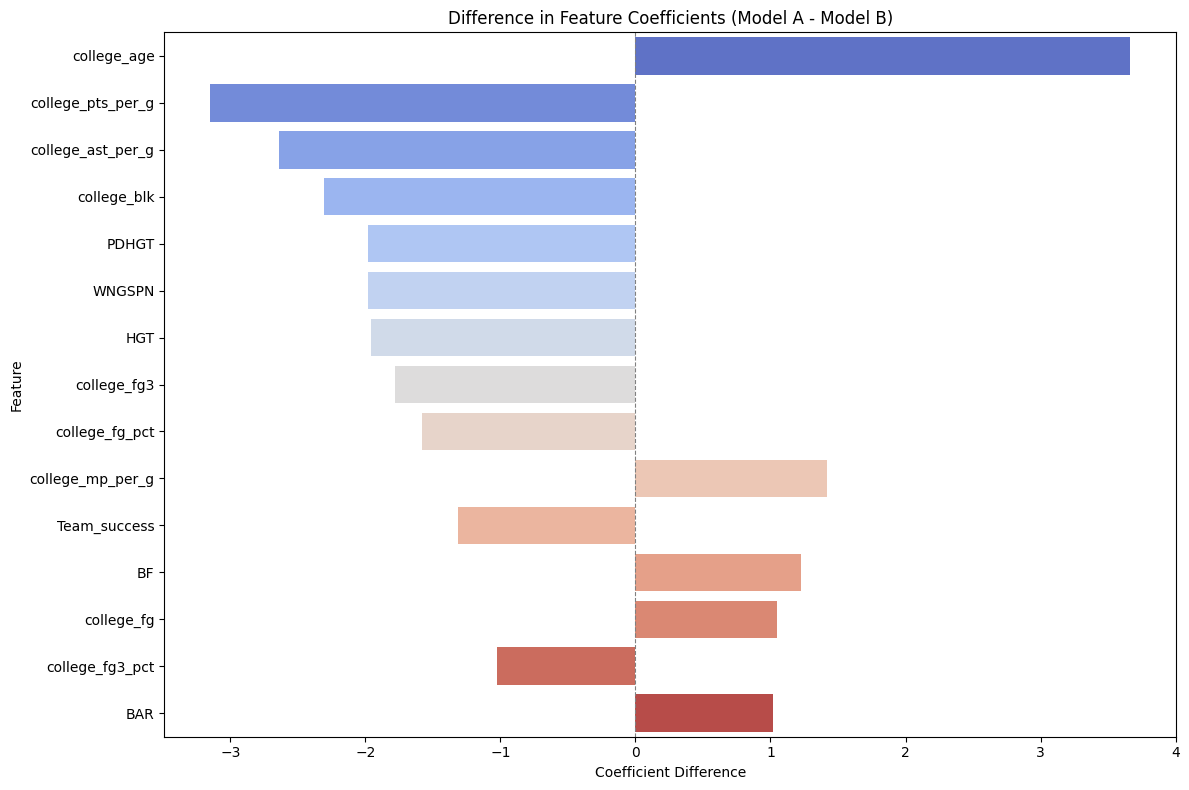


Top Overvalued by Draft Model (Model A):
        Feature  Model_A_Coeff    Mag_A  Model_B_Coeff    Mag_B  Mag_Diff
     college_mp      -0.067967 0.067967       0.399315 0.399315  0.331348
    college_tov      -0.299726 0.299726       0.208932 0.208932 -0.090794
college_fg3_pct      -0.763456 0.763456       0.261968 0.261968 -0.501488

Top Overlooked by Draft Model (Model A):
       Feature  Model_A_Coeff    Mag_A  Model_B_Coeff    Mag_B  Mag_Diff
college_ft_pct      -0.097388 0.097388      -0.968638 0.968638  0.871250
           WGT      -0.282167 0.282167      -0.835767 0.835767  0.553600
      VERT_SUM      -0.332795 0.332795      -0.634681 0.634681  0.301886
         BENCH       0.662365 0.662365       0.866363 0.866363  0.203998
    college_pf       0.270575 0.270575       0.315850 0.315850  0.045275


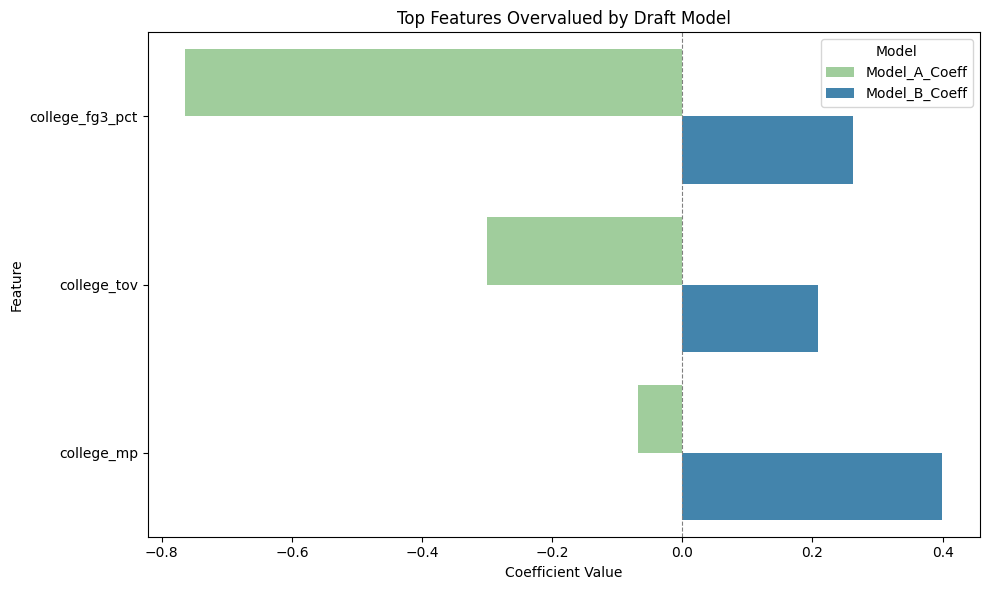

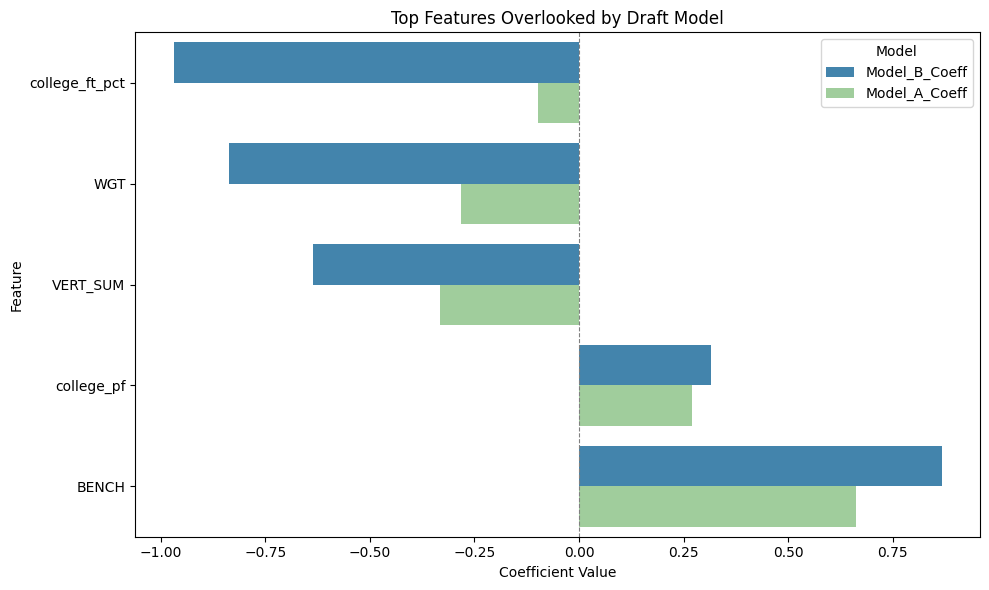

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Difference', y='Feature', data=comparison_sorted.head(15),
            palette='coolwarm')
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.title('Difference in Feature Coefficients (Model A - Model B)')
plt.xlabel('Coefficient Difference')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

comparison['Sign_A'] = np.sign(comparison['Model_A_Coeff'])
comparison['Sign_B'] = np.sign(comparison['Model_B_Coeff'])
comparison['Mag_A'] = abs(comparison['Model_A_Coeff'])
comparison['Mag_B'] = abs(comparison['Model_B_Coeff'])
comparison['Mag_Diff'] = comparison['Mag_B'] - comparison['Mag_A']

comparison['Overvalued'] = (comparison['Model_A_Coeff'] < 0) & (comparison['Model_B_Coeff'] > 0)

comparison['Overlooked'] = (comparison['Sign_A'] == comparison['Sign_B']) & (comparison['Mag_Diff'] > 0.001)

top_overvalued = comparison[comparison['Overvalued']] \
    .copy() \
    .sort_values(by='Mag_Diff', ascending=False) \
    .head(5)

top_overlooked = comparison[comparison['Overlooked']] \
    .copy() \
    .sort_values(by='Mag_Diff', ascending=False) \
    .head(5)

print("\nTop Overvalued by Draft Model (Model A):")
print(top_overvalued[['Feature', 'Model_A_Coeff', 'Mag_A', 'Model_B_Coeff', 'Mag_B', 'Mag_Diff']].to_string(index=False))

print("\nTop Overlooked by Draft Model (Model A):")
print(top_overlooked[['Feature', 'Model_A_Coeff', 'Mag_A', 'Model_B_Coeff', 'Mag_B', 'Mag_Diff']].to_string(index=False))

if not top_overvalued.empty:
    plot_data_overvalued = top_overvalued.melt(id_vars=['Feature'], value_vars=['Model_A_Coeff', 'Model_B_Coeff'],
                                               var_name='Model', value_name='Coefficient')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', hue='Model', data=plot_data_overvalued.sort_values(by='Coefficient', ascending=True),
                palette={'Model_A_Coeff': '#99D594', 'Model_B_Coeff': '#3288BD'})
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.title('Top Features Overvalued by Draft Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo features classified as 'Overvalued' based on the criteria.")

if not top_overlooked.empty:
    plot_data_overlooked = top_overlooked.melt(id_vars=['Feature'], value_vars=['Model_A_Coeff', 'Model_B_Coeff'],
                                               var_name='Model', value_name='Coefficient')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', hue='Model', data=plot_data_overlooked.sort_values(by='Coefficient', ascending=False if plot_data_overlooked['Coefficient'].iloc[0] > 0 else True),
                palette={'Model_A_Coeff': '#99D594', 'Model_B_Coeff': '#3288BD'}) # Choose distinct colors
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
    plt.title('Top Features Overlooked by Draft Model')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()
else:
    print("\nNo features classified as 'Overlooked' based on the criteria.")